# ✏️ Esercizi {#ex-likert}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
source("../../code/_common.R")

## Scaling Likert 

In questo tutorial, ripreso da @brown2023psychometrics, esamineremo i dati di un questionario ordinale. In particolare, esamineremo il **Strengths and Difficulties Questionnaire (SDQ)**, ovvero un breve questionario di screening comportamentale progettato per valutare i comportamenti di bambini e adolescenti tra i 3 e i 16 anni. Il SDQ è disponibile in diverse versioni per soddisfare le esigenze di ricercatori, clinici ed educatori. Per maggiori informazioni, è possibile consultare il sito ufficiale [http://www.sdqinfo.org/](http://www.sdqinfo.org/), dove è possibile scaricare il questionario, insieme alle chiavi di scoring e alle norme pubblicate dal distributore del test. 

La versione auto-compilata del questionario, destinata ai ragazzi stessi, include 25 item suddivisi in 5 scale (o dimensioni) che misurano specifici aspetti comportamentali. Ogni scala comprende 5 item:

- **Sintomi Emotivi:** somatizzazione, preoccupazioni, infelicità, attaccamento, paura  
- **Problemi di Condotta:** capricci, ubbidienza*, litigi, bugie, furti  
- **Iperattività:** irrequietezza, agitazione, distrazione, riflessione*, attenzione*  
- **Problemi con i Pari:** solitudine, amicizia*, popolarità*, vittimismo, miglior amico più grande  
- **Comportamento Prosociale:** considerazione, condivisione, empatia, gentilezza, aiuto agli altri  

Ogni item viene valutato dai partecipanti utilizzando le seguenti opzioni di risposta:

- **0 = "Non vero"**  
- **1 = "Parzialmente vero"**  
- **2 = "Assolutamente vero"**  

Alcuni item nel SDQ rappresentano comportamenti che devono essere invertiti rispetto alla scala di appartenenza, ossia **item a punteggio invertito**. Questo significa che punteggi alti sulla scala corrispondono a punteggi bassi per questi specifici item. Ad esempio, l'item *"Di solito faccio ciò che mi viene detto"* (variabile "obeys") è un item a punteggio invertito per la scala "Problemi di Condotta". 

Nel SDQ sono presenti 5 item di questo tipo, contrassegnati con un asterisco (*) nella tabella. Questi item devono essere codificati invertendo i punteggi (ad esempio, da 0 a 2 e viceversa) prima di calcolare il punteggio complessivo della scala.

In questo studio, i partecipanti sono studenti di prima media (Year 7) provenienti dalla stessa scuola, per un totale di **228 ragazzi**. Si tratta di un campione della comunità scolastica, quindi non ci si aspetta che molti dei partecipanti superino le soglie cliniche indicate dal test. 

Il questionario SDQ è stato somministrato due volte:

1. La prima somministrazione è avvenuta all'inizio della scuola secondaria, quando i ragazzi erano nel Year 7.  
2. La seconda somministrazione è avvenuta un anno dopo, quando i partecipanti erano nel Year 8.  

Questa progettazione longitudinale consente di analizzare eventuali cambiamenti nei punteggi SDQ durante il passaggio tra il primo e il secondo anno di scuola secondaria.

## Emotional Symptoms scale

Iniziamo ad esaminare la scala **Emotional Symptoms**. Questa scala non contiene item reverse. Importiamo i dati in R.

In [3]:
load("../../data/data_sdq/SDQ.RData")
glimpse(SDQ)

Rows: 228
Columns: 51
$ Gender   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ consid   <dbl> 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, ~
$ restles  <dbl> 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, ~
$ somatic  <dbl> 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, ~
$ shares   <dbl> 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, ~
$ tantrum  <dbl> 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, ~
$ loner    <dbl> 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, ~
$ obeys    <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, ~
$ worries  <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, ~
$ caring   <dbl> 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, ~
$ fidgety  <dbl> 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ~
$ friend   <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, ~
$ fights   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Selezioniamo solo gli item della Emotional Symptoms scale al tempo 1.

In [6]:
items_emotion <- c("somatic", "worries", "unhappy", "clingy", "afraid")
sdq_emo <- SDQ[, items_emotion]  
sdq_emo |>
    head()

somatic,worries,unhappy,clingy,afraid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0,1,0
2,0,0,1,0
0,0,0,0,1
0,0,0,1,1
2,1,0,1,0
1,0,0,1,0


Calcoliamo il punteggio della scala.

In [7]:
rowSums(sdq_emo) |> print()

  [1]  4  3  1  2  4  2  4  0  1  1  0  8  2  3  7  4  5  2  8  6  1  4  9
 [24]  4  5  9  0  3  3  1  0  2  6  3  9  4  4  0  7  1  3  6  4  5  4  1
 [47]  4  1  0  5  1  2  2  4  4  4  6  1  8  3  2  2  4  1  1  0  2  2  7
 [70]  5  0 NA NA  1  1  7  4  1  8  3  5  0  5  4  0  1  1  5  3  6  1  3
 [93]  2  6  6  0  2  4  5  3  3  1  1  7  2  3  5  5 NA  0  4  0  4  1  1
[116]  1  1  0  2  7  0  3  8  4  6 NA  2  4  7  1  0  0  1  0  4  3  0 10
[139]  5  2  1  6  1  2  1  0  1 NA  4  4  2  4  7  5  6  1  0  5  3  1  3
[162]  3  6  4  2  3  1  0  3  3  0  3  0  0  0  2  2  2  0  1  5  3  3  1
[185]  4  3  1  6  2  4  2 NA  0  2  5  5  0  2  2  3  4  0  2  4  2  2  1
[208]  3  2  0  1  0  0  8  1  1  2  1  2  2  4  0  0  1  2  2  1  6


Notiamo che ci sono diversi punteggi mancanti, denotati da NA. Un primo metodo per affrontare i dati mancanti è semplicemente quello di ignorarli:

In [8]:
rowSums(sdq_emo, na.rm = TRUE) |> print()

  [1]  4  3  1  2  4  2  4  0  1  1  0  8  2  3  7  4  5  2  8  6  1  4  9
 [24]  4  5  9  0  3  3  1  0  2  6  3  9  4  4  0  7  1  3  6  4  5  4  1
 [47]  4  1  0  5  1  2  2  4  4  4  6  1  8  3  2  2  4  1  1  0  2  2  7
 [70]  5  0  2  7  1  1  7  4  1  8  3  5  0  5  4  0  1  1  5  3  6  1  3
 [93]  2  6  6  0  2  4  5  3  3  1  1  7  2  3  5  5  4  0  4  0  4  1  1
[116]  1  1  0  2  7  0  3  8  4  6  0  2  4  7  1  0  0  1  0  4  3  0 10
[139]  5  2  1  6  1  2  1  0  1  4  4  4  2  4  7  5  6  1  0  5  3  1  3
[162]  3  6  4  2  3  1  0  3  3  0  3  0  0  0  2  2  2  0  1  5  3  3  1
[185]  4  3  1  6  2  4  2  4  0  2  5  5  0  2  2  3  4  0  2  4  2  2  1
[208]  3  2  0  1  0  0  8  1  1  2  1  2  2  4  0  0  1  2  2  1  6


Tuttavia, questa non è una buona idea. Anche per il fatto che, in questo modo non verrà calcolato il punteggio totale di 7 partecipanti. Possiamo identificare le colonne in cui ci sono dei valori mancanti usando `summary()`.

In [9]:
summary(sdq_emo)

    somatic         worries         unhappy          clingy     
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :1.000  
 Mean   :0.611   Mean   :0.621   Mean   :0.317   Mean   :0.842  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
 NA's   :2       NA's   :1       NA's   :1                      
     afraid    
 Min.   :0.00  
 1st Qu.:0.00  
 Median :0.00  
 Mean   :0.48  
 3rd Qu.:1.00  
 Max.   :2.00  
 NA's   :3     

Un approccio semplice per gestire il problema dei dati mancanti è l'imputazione, che consiste nel sostituire i valori mancanti con stime plausibili basate sulle informazioni disponibili nel dataset. Il metodo più elementare di imputazione prevede la sostituzione del valore mancante con la media della colonna corrispondente. Questo approccio è facile da implementare e può essere utile come soluzione preliminare, ma potrebbe non catturare correttamente la variabilità e le relazioni tra le variabili.

In [10]:
sdq_emo <- sdq_emo %>%
    mutate_at(vars(somatic:afraid), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))

Questa istruzione utilizza la funzione `mutate_at` del pacchetto dplyr per applicare una trasformazione a colonne specifiche (da `somatic` a `afraid`). All'interno della funzione di trasformazione, essa controlla se ogni valore è mancante (`NA`). Se lo è, lo sostituisce con la media della colonna usando `mean(., na.rm = TRUE)`, che calcola la media escludendo eventuali valori mancanti. 

Possiamo ora calcolare il punteggio della scala per ciascun partecipante.

In [12]:
SDQ$s_emotion <- rowSums(sdq_emo) |> round()
SDQ$s_emotion |> print()

  [1]  4  3  1  2  4  2  4  0  1  1  0  8  2  3  7  4  5  2  8  6  1  4  9
 [24]  4  5  9  0  3  3  1  0  2  6  3  9  4  4  0  7  1  3  6  4  5  4  1
 [47]  4  1  0  5  1  2  2  4  4  4  6  1  8  3  2  2  4  1  1  0  2  2  7
 [70]  5  0  2  8  1  1  7  4  1  8  3  5  0  5  4  0  1  1  5  3  6  1  3
 [93]  2  6  6  0  2  4  5  3  3  1  1  7  2  3  5  5  5  0  4  0  4  1  1
[116]  1  1  0  2  7  0  3  8  4  6  0  2  4  7  1  0  0  1  0  4  3  0 10
[139]  5  2  1  6  1  2  1  0  1  4  4  4  2  4  7  5  6  1  0  5  3  1  3
[162]  3  6  4  2  3  1  0  3  3  0  3  0  0  0  2  2  2  0  1  5  3  3  1
[185]  4  3  1  6  2  4  2  5  0  2  5  5  0  2  2  3  4  0  2  4  2  2  1
[208]  3  2  0  1  0  0  8  1  1  2  1  2  2  4  0  0  1  2  2  1  6


Un istogramma si ottiene nel modo seguente.

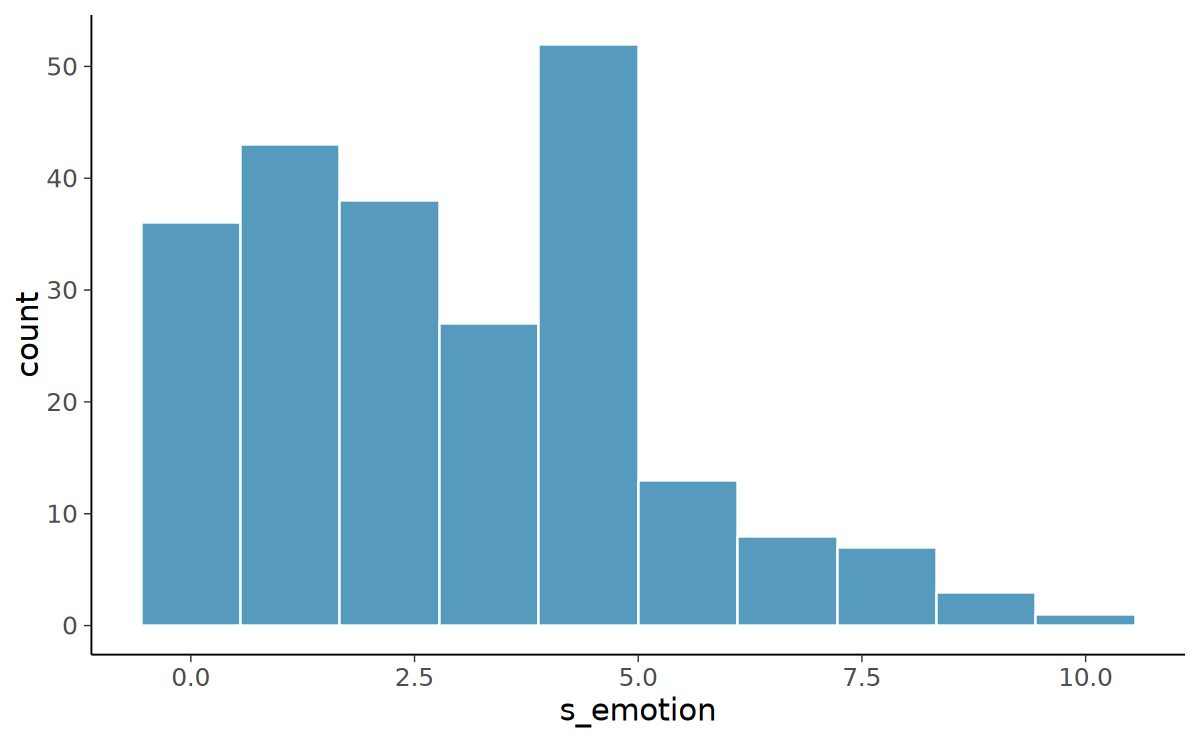

In [13]:
SDQ |>
    ggplot(aes(x = s_emotion)) +
    geom_histogram(bins = 10)

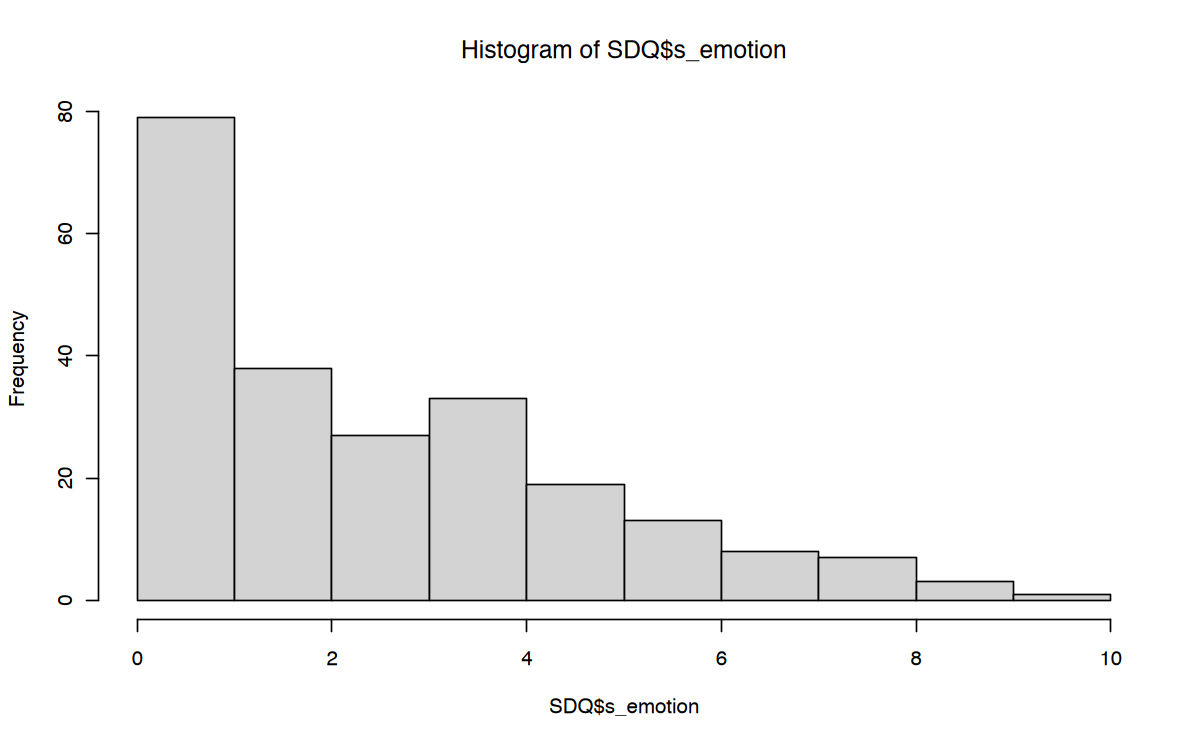

In [14]:
hist(SDQ$s_emotion)

Più utile è un KDE plot.

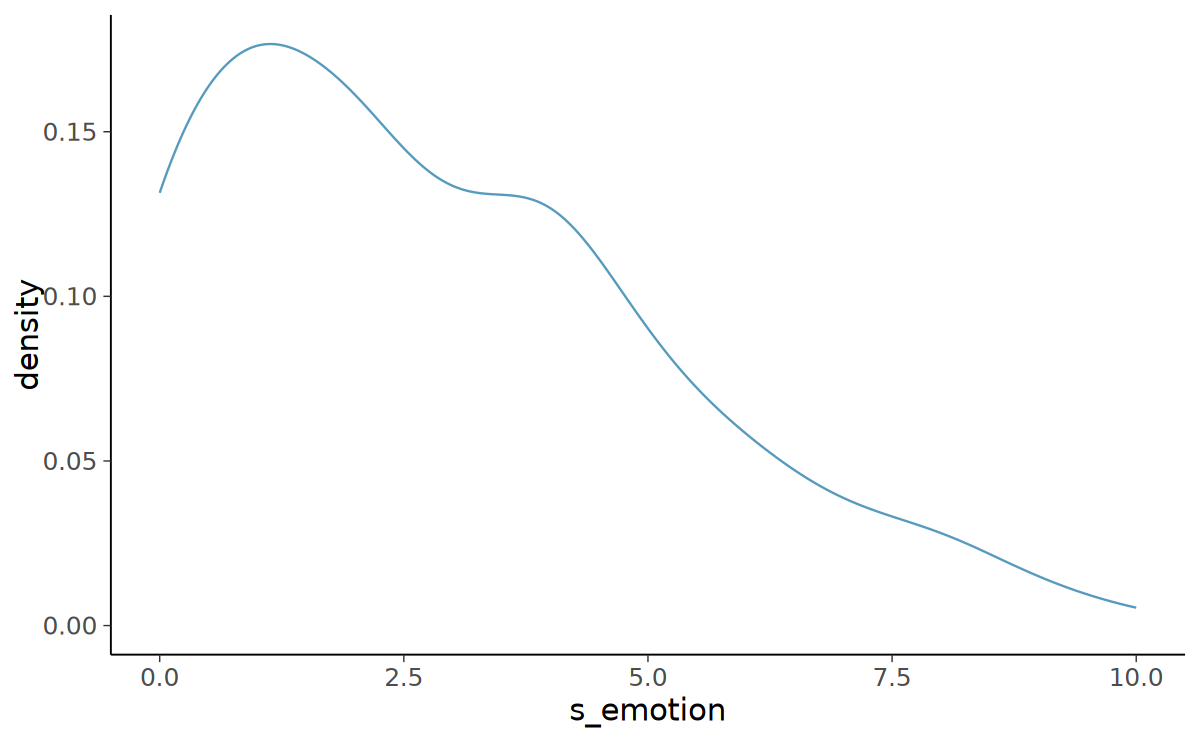

In [15]:
SDQ |>
    ggplot(aes(x = s_emotion)) +
    geom_density()

Possiamo ottenere le statistiche descrittive della scala usando la funzione `describe` del pacchetto `psych`.

In [16]:
describe(SDQ$s_emotion)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,228,2.87,2.31,2,2.65,2.97,0,10,10,0.722,-0.143,0.153


Come si può vedere, la mediana (il punteggio al di sotto del quale si trova la metà del campione) di `s_emotion` è 2, mentre la media è più alta e pari a 2.87. Questo perché la distribuione dei punteggi è asimmetrica positiva; in questo caso, la mediana è più rappresentativa della tendenza centrale. Queste statistiche sono coerenti con la nostra osservazione dell'istogramma, che mostra un forte *floor effect*.

Di seguito sono riportati i valori di soglia per i casi "Normali", "Borderline" e "Anormali" per i Sintomi Emotivi forniti dal publisher del test (vedi https://sdqinfo.org/). Questi sono i punteggi che distinguono i casi probabilmente borderline e anormali dai casi "normali".

```
Normale: 0-5
Borderline: 6
Anormale: 7-10
```

In [17]:
table(SDQ$s_emotion <= 5)


FALSE  TRUE 
   32   196 

In questo campione, dunque, l'85% dei partecipanti è classificato nell'intervallo Normale.

In [18]:
table(SDQ$s_emotion <= 5)[2] / length(SDQ$s_emotion)

TRUE 
0.86

In maniera equivalente otteniamo i valori dei partecipanti "borderline":

In [20]:
table(SDQ$s_emotion == 6)[2] / length(SDQ$s_emotion)

TRUE 
0.057

e dei partecipanti "anormali":

In [21]:
table(SDQ$s_emotion >= 7)[2] / length(SDQ$s_emotion)

TRUE 
0.0833

## Item reverse

In un secondo esempio consideriamo la codifica delle risposte degli item SDQ che misurano i Problemi di Condotta. Alcuni item sono stati codificati usando una codifica inversa. Prima di calcolare il punteggio totale è dunque necessario invertire il punteggio degli item a codifica inversa.

In [23]:
items_conduct <- c("tantrum", "obeys", "fights", "lies", "steals")

Per i Problemi di Condotta, abbiamo solo un item reverse, `obeys`. 

```
tantrum    obeys*      fights       lies       steals
```

Per invertire il codice di questo item, useremo una funzione dedicata del pacchetto psych, `reverse.code()`. Questa funzione ha la forma generale `reverse.code(keys, items,…)`. L'argomento `keys` è un vettore di valori 1 o -1, dove -1 implica l'inversione dell'item. L'argomento `items` sono i nomi delle variabili che vogliamo valutare. 

In [27]:
R_conduct <- reverse.code(keys = c(1, -1, 1, 1, 1), SDQ[, items_conduct]) |> as_tibble()
R_conduct |> head()

tantrum,obeys-,fights,lies,steals
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
1,2,0,2,0
0,0,0,0,0


In [28]:
SDQ[, items_conduct] |> head()

tantrum,obeys,fights,lies,steals
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2,0,0,0
0,2,0,0,0
0,2,0,0,0
0,2,0,0,0
1,0,0,2,0
0,2,0,0,0


Anche in questo caso ci sono dei dati mancanti.

In [29]:
summary(R_conduct)

    tantrum          obeys-          fights           lies      
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :1.000   Median :0.000   Median :0.000  
 Mean   :0.571   Mean   :0.579   Mean   :0.193   Mean   :0.544  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:0.000   3rd Qu.:1.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
 NA's   :2                                       NA's   :2      
     steals     
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 Mean   :0.185  
 3rd Qu.:0.000  
 Max.   :2.000  
 NA's   :1      

Usiamo la stessa procedura descritta in precedenza:

In [30]:
R_conduct <- R_conduct %>%
    mutate_at(vars(tantrum:steals), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))

Calcoliamo ora il punteggio totale.

In [31]:
SDQ$s_conduct <- rowMeans(R_conduct)

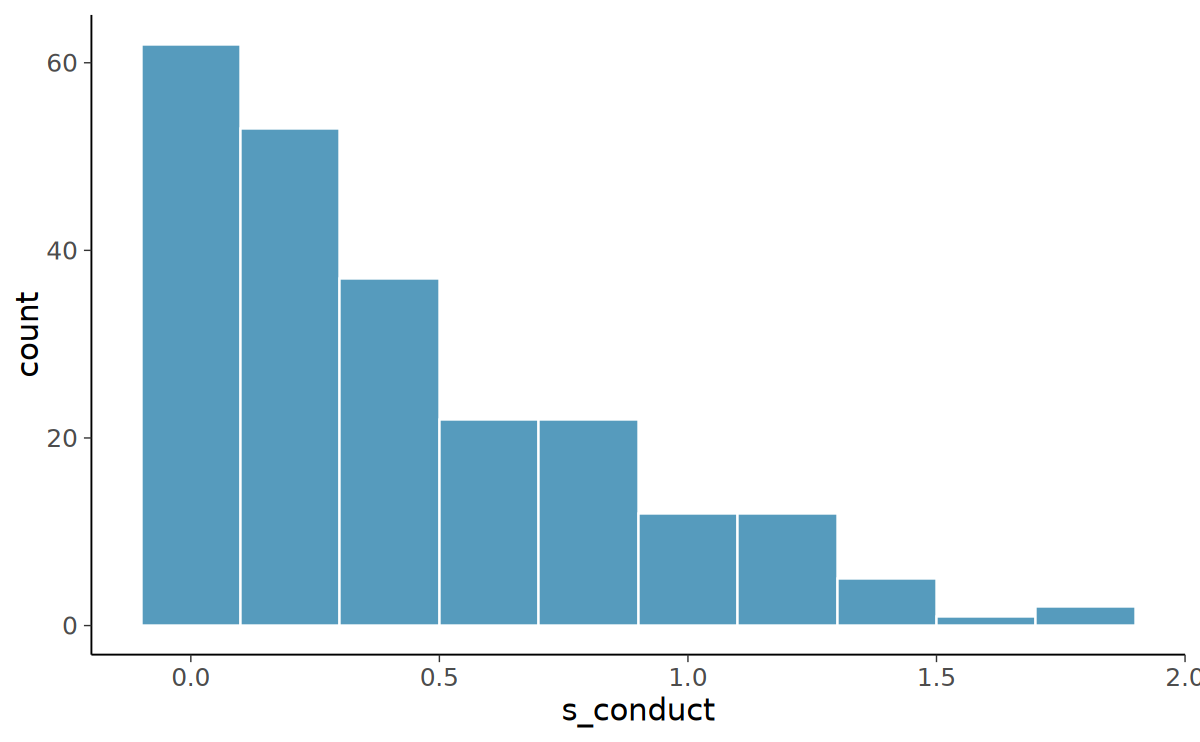

In [32]:
SDQ |>
    ggplot(aes(x = s_conduct)) +
    geom_histogram(bins = 10)

## Session Info

In [74]:
sessionInfo() 

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
 [5] ggExtra_0.10.1    bayesplot_1.11.1  gridExtra_2.3     patchwork_1.3.0  
 [9] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-18     psych_2.4.6.26   
[13] scales_1.3.0      markdown_1.13     knitr_1.48        lubridate_1.9.3  
[17] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[21] readr_2.1.5       tidyr_1.3.1       tibble_3.2.1      ggplot2_3.5.1    
[25] tidyverse_2.0.0   here_1.0